<h2> Cleaning & Analyzing the EUvsDisinfo Dataset

*please note that this notebook contains all of the code I ever wrote to do this project. It's very unorganized. If you want to see what I did & the conclusions I made, see 'ukr-report'*

First read it in.

In [1]:
import csv
from pprint import pprint

def prepare_datasets(file_path):
    with open(file_path) as infile:
        reader = csv.DictReader(infile, delimiter=',')
        list_of_dicts = [dict(r) for r in reader]
        
    return list_of_dicts

eu_data = prepare_datasets("eudis-scraped-all.csv")
print(len(eu_data))
pprint(eu_data[0])

5141
{'date': 'DATE OF PUBLICATION: 22/04/2022',
 'disinfo-case-link': 'The EU should stop Kyiv from committing war crimes',
 'disinfo-case-link-href': 'https://euvsdisinfo.eu/report/pls-sthe-eu-should-stop-kyiv-from-committing-war-crimes',
 'keywords': 'Keywords: Brussels, war crimes, Invasion of Ukraine, Donbas, '
             'Russophobia',
 'title': 'Disinfo: The EU should stop Kyiv from committing war crimes',
 'web-scraper-order': '1653630041-295',
 'web-scraper-start-url': 'https://euvsdisinfo.eu/disinformation-cases/?text=&date=&disinfo_countries%5B%5D=77547&per_page=100'}


<br>
The data is a little messy and has extra words I don't want, like 'DATE OF PUBLICATION' included in the date value, so I'm gonna fix that with Regex functions.

In [2]:
import re

print(type(eu_data[0]['keywords']))
print(type(eu_data[0]['date']))
print()
for case in eu_data:
    case['keywords'] = re.sub("Keywords: ", "", case['keywords'])
    case['date'] = re.sub("DATE OF PUBLICATION: ", "", case['date'])
pprint(eu_data[0])

<class 'str'>
<class 'str'>

{'date': '22/04/2022',
 'disinfo-case-link': 'The EU should stop Kyiv from committing war crimes',
 'disinfo-case-link-href': 'https://euvsdisinfo.eu/report/pls-sthe-eu-should-stop-kyiv-from-committing-war-crimes',
 'keywords': 'Brussels, war crimes, Invasion of Ukraine, Donbas, Russophobia',
 'title': 'Disinfo: The EU should stop Kyiv from committing war crimes',
 'web-scraper-order': '1653630041-295',
 'web-scraper-start-url': 'https://euvsdisinfo.eu/disinformation-cases/?text=&date=&disinfo_countries%5B%5D=77547&per_page=100'}


Before converting to datetime objects, it would be good to remove any null date values. 

In [3]:
for case in eu_data:
    if case['date'] == "null":
        eu_data.remove(case)
        
for case in eu_data:
    if case['date'] == "null":
        print("found null")
        break

In [4]:
from datetime import datetime

for case in eu_data:
    case['keywords'] = re.split(', ', case['keywords'])
    #if case['date'] != 'null': 
    case['date'] = re.sub('/', ' ', case['date'])
    case['date'] = datetime.strptime(case['date'], '%d %m %Y')
pprint(eu_data[100])    

{'date': datetime.datetime(2022, 2, 25, 0, 0),
 'disinfo-case-link': 'The West had been provoking the war in Ukraine for '
                      'years – Russia had no other choice',
 'disinfo-case-link-href': 'https://euvsdisinfo.eu/report/the-west-had-been-provoking-the-war-in-ukraine-for-years-russia-had-no-other-choice',
 'keywords': ['War in Ukraine',
              'Anti-Russian',
              'Encircling Russia',
              'NATO',
              'Provocation',
              'Vladimir Putin',
              'Destabilising Russia'],
 'title': 'Disinfo: The West had been provoking the war in Ukraine for years – '
          'Russia had no other choice',
 'web-scraper-order': '1653630740-372',
 'web-scraper-start-url': 'https://euvsdisinfo.eu/disinformation-cases/?text=&date=&disinfo_countries%5B0%5D=77547&per_page=100&offset=100'}


<br>
Now I will count up the number of cases for each date.

In [5]:
date_counts = {}
for i in eu_data:
    #print(i)
    date = i['date']
    #print(date)
    if date in date_counts: date_counts[date] += 1
    else: date_counts[date] = 1

Printing in a human-readable form (uncomment to test)

In [6]:
# for date in date_counts: print(date.strftime('%x') + ": " + str(date_counts[date]))

Now I will plot date vs. number of cases on a graph.

In [7]:
import matplotlib.pyplot as plt 

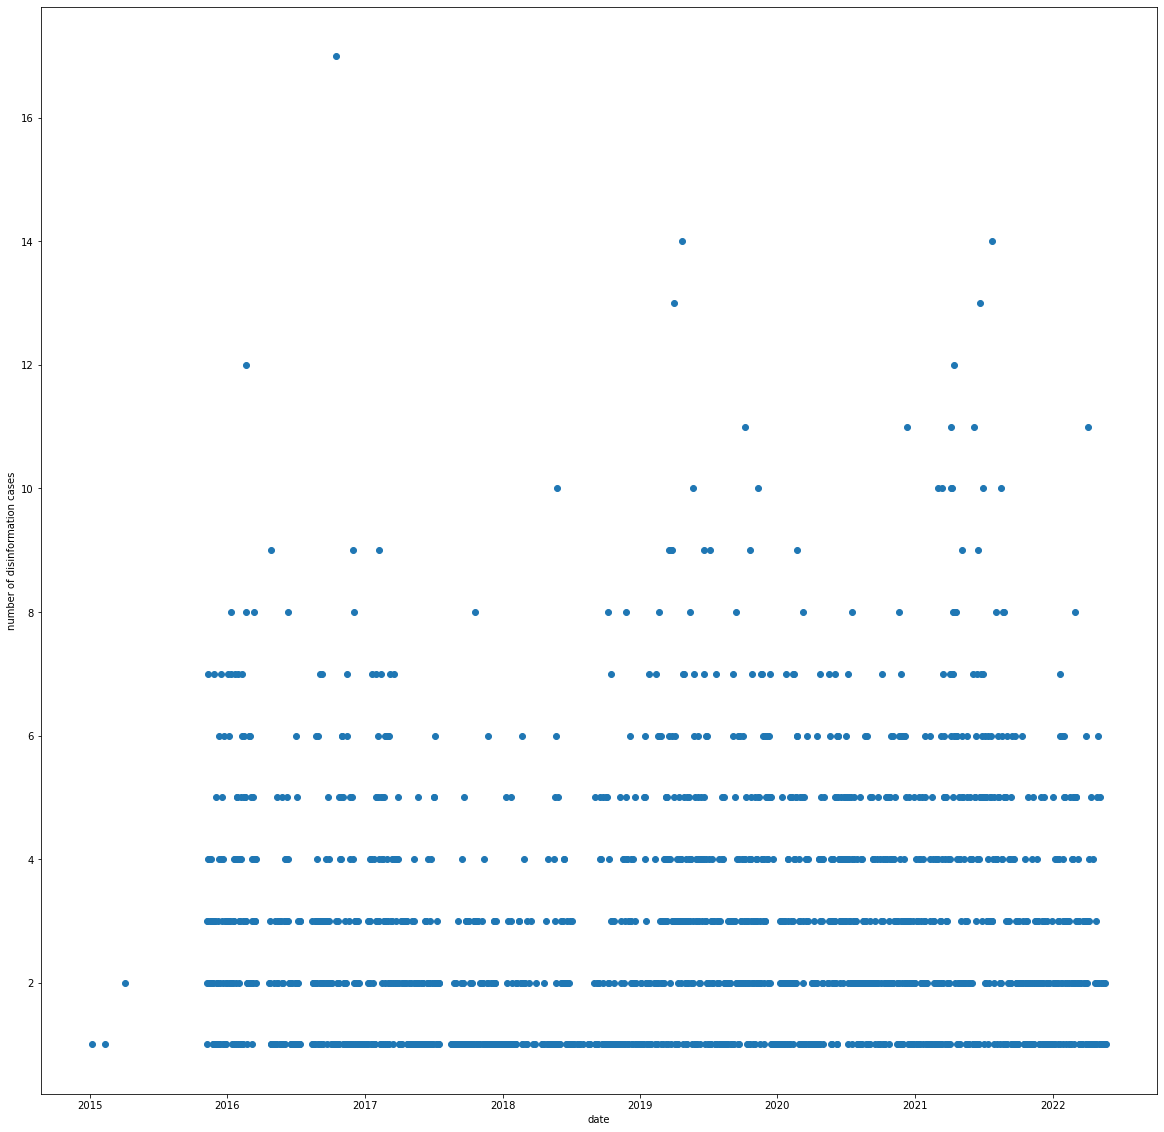

In [8]:
plt.figure(figsize = (20,20))
plt.scatter(date_counts.keys(), date_counts.values())
plt.xlabel("date")
plt.ylabel("number of disinformation cases")
plt.show()

It doesn't look like it will be very easy to detect a trend looking at number of cases per day, so I'm gonna make two more dictionaries of counts - cases per year, and cases per month+year

In [9]:
year_counts = {}
month_counts = {}
for i in eu_data:

    year = i['date'].year
    # month = str(i['date'].year) + ", " +  str(i['date'].month)
    month = i['date'].strftime("%Y-%m")
    #update the year dictionary
    if year in year_counts: year_counts[year] += 1
    else: year_counts[year] = 1
    
    #update the month dictionary
    if month in month_counts: month_counts[month] += 1
    else: month_counts[month] = 1

pprint(year_counts)
print()
print() 
pprint(month_counts)

{2015: 146,
 2016: 712,
 2017: 559,
 2018: 408,
 2019: 1016,
 2020: 954,
 2021: 1047,
 2022: 297}


{'2015-01': 1,
 '2015-02': 1,
 '2015-04': 2,
 '2015-11': 65,
 '2015-12': 77,
 '2016-01': 99,
 '2016-02': 104,
 '2016-03': 61,
 '2016-04': 19,
 '2016-05': 48,
 '2016-06': 53,
 '2016-07': 31,
 '2016-08': 44,
 '2016-09': 77,
 '2016-10': 66,
 '2016-11': 73,
 '2016-12': 37,
 '2017-01': 65,
 '2017-02': 95,
 '2017-03': 83,
 '2017-04': 40,
 '2017-05': 39,
 '2017-06': 43,
 '2017-07': 34,
 '2017-08': 12,
 '2017-09': 39,
 '2017-10': 47,
 '2017-11': 36,
 '2017-12': 26,
 '2018-01': 32,
 '2018-02': 36,
 '2018-03': 16,
 '2018-04': 10,
 '2018-05': 50,
 '2018-06': 44,
 '2018-07': 9,
 '2018-08': 4,
 '2018-09': 44,
 '2018-10': 54,
 '2018-11': 54,
 '2018-12': 55,
 '2019-01': 53,
 '2019-02': 57,
 '2019-03': 104,
 '2019-04': 113,
 '2019-05': 97,
 '2019-06': 109,
 '2019-07': 64,
 '2019-08': 54,
 '2019-09': 84,
 '2019-10': 104,
 '2019-11': 107,
 '2019-12': 70,
 '2020-01': 61,
 '2020-02': 100,
 '2020-03': 62,
 '

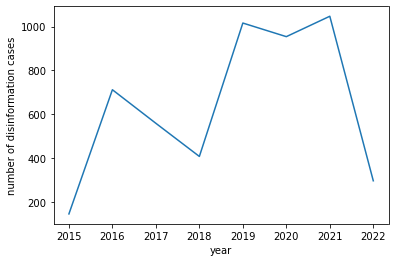

In [10]:
plt.plot(year_counts.keys(), year_counts.values())
plt.xlabel("year")
plt.ylabel("number of disinformation cases")
plt.show()

Avg cases/day in a year might be more informative, since we are only partway through 2022 so naturally there are gonna be less cases.

In [11]:
year_avg_counts = {}

for year in year_counts:
    if year != 2022:
        year_avg_counts[year] = year_counts[year]/365
    if year == 2022: 
        year_avg_counts[2022] = year_counts[2022]/147 # bc I scraped the data on 5/27

pprint(year_avg_counts) 

{2015: 0.4,
 2016: 1.9506849315068493,
 2017: 1.5315068493150685,
 2018: 1.1178082191780823,
 2019: 2.7835616438356166,
 2020: 2.6136986301369864,
 2021: 2.8684931506849316,
 2022: 2.020408163265306}


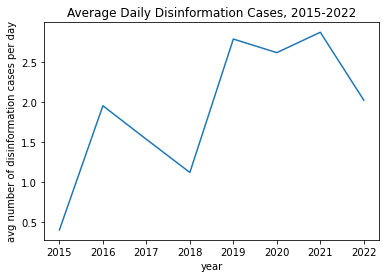

In [12]:
plt.plot(year_avg_counts.keys(), year_avg_counts.values())
plt.xlabel("year")
plt.ylabel("avg number of disinformation cases per day")
plt.title("Average Daily Disinformation Cases, 2015-2022")
plt.show()

I'll also plot the cases per month.

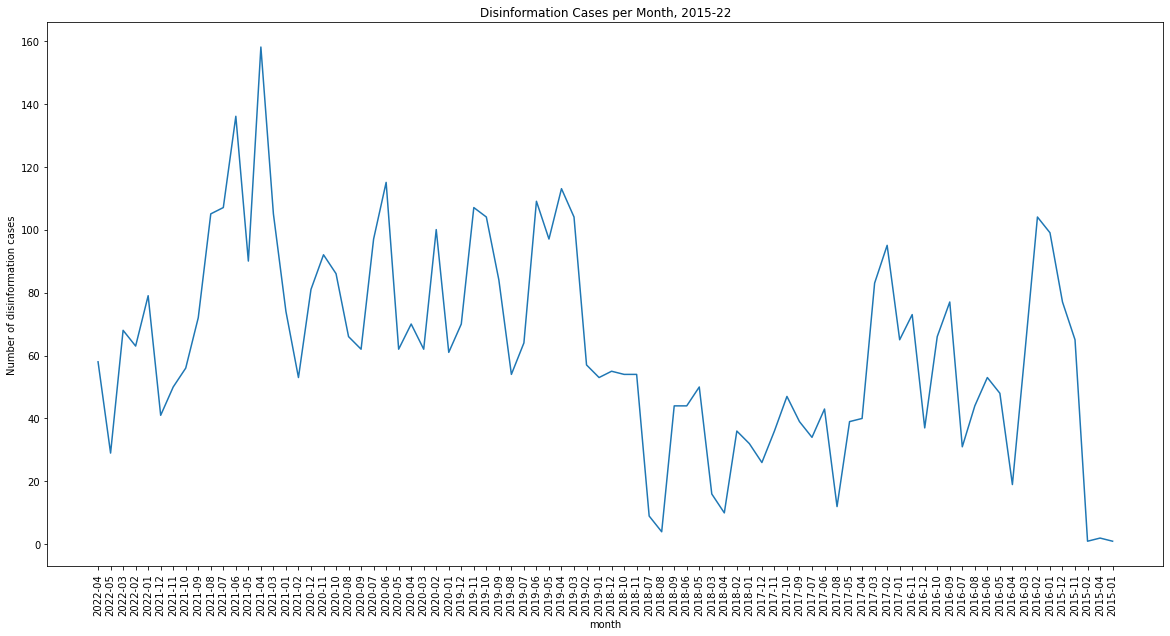

In [13]:
import numpy as np
plt.figure(figsize = (20,10))
plt.plot(month_counts.keys(), month_counts.values())
plt.xlabel("month")
plt.ylabel("Number of disinformation cases")
plt.title("Disinformation Cases per Month, 2015-22")
plt.tick_params(axis ='x', rotation = 90)
#plt.xticks(np.arange(2015, 2022, 5))
plt.show()

There's something wrong with the month counts data...

In [14]:
for case in eu_data:
    

IndentationError: expected an indented block (564710789.py, line 2)

Based on the graph, it looks like there are some periods of time where there are big peaks - I wonder if these months correlate with certain things on my timeline?
<br>
I'll get more information on which months there were over 80 cases.
<br>
<br>
Why 80? In the average cases per year, I can see that the largest average is a little under 2.5 cases/day. 80 cases in one month would be over 2.5 cases/day. Looking at this graph, it looks like there are quite a few months that do peak above 80.

In [15]:
large_month_counts = {}

for month in month_counts:
    if month_counts[month] >= 80: large_month_counts[month] = month_counts[month]
    
pprint(large_month_counts)

{'2016-01': 99,
 '2016-02': 104,
 '2017-02': 95,
 '2017-03': 83,
 '2019-03': 104,
 '2019-04': 113,
 '2019-05': 97,
 '2019-06': 109,
 '2019-09': 84,
 '2019-10': 104,
 '2019-11': 107,
 '2020-02': 100,
 '2020-06': 115,
 '2020-07': 97,
 '2020-10': 86,
 '2020-11': 92,
 '2020-12': 81,
 '2021-03': 105,
 '2021-04': 158,
 '2021-05': 90,
 '2021-06': 136,
 '2021-07': 107,
 '2021-08': 105}


Interestingly, all of the months with many cases occurred before the war started in 2022.

I'll now compare the case counts per month with events happening that month from the NPR timeline.

| year & month    | events        |
| ----------- | ----------- |
| Apr 2021          | Russia sends about 100,000 troops to Ukraine's borders, ostensibly for military exercises.     |
| Aug 2021          | Two years after his entanglement with Trump, Zelenskyy visits the White House to meet with President Biden. Biden emphasizes that the U.S. is committed to "Ukraine's sovereignty and territorial integrity in the face of Russian aggression" but repeats that Ukraine has not yet met the conditions necessary to join NATO.    |


Doesn't look like there's much crossover between high levels of disinformation and the NPR timeline - only two of the year,month pairs with high levels are actually discussed in the article. <br>
<br>
It's hard to say if these peaks are random, or if they relate to something bigger. One way to find out more is by looking at the keywords - if similar keywords are clustered together on the timeline, that might indicate that Russia was coordinating an organized campaign at the time.
<br>
To do a small test, I'll take the month with the maximum cases, and then if it seems like there's something there I will scope this to a larger amount timeframe.

In [16]:
max_cases = max(large_month_counts.values())

for month in large_month_counts:
    if large_month_counts[month] == max_cases: print(month,"-",large_month_counts[month])

2021-04 - 158


In April 2021 there were 158 cases - interestingly, this is also 1 of the 2 year,month pairs that was discussed in the NPR timeline - at this time, Russia sent troops to Ukraine. Maybe the cases are related to this... 

In [17]:
apr2021 = {}
aprkeywords = []

for case in eu_data:
    if case['date'].year == 2021 and case['date'].month == 4:
        if case['date'] in apr2021:
            apr2021[case['date']].extend(case['keywords'])
            aprkeywords.extend(case['keywords'])
        else: 
            apr2021[case['date']] = case['keywords']
            aprkeywords.extend(case['keywords'])
        
#pprint(apr2021)
#pprint(aprkeywords)

Counts of each keyword

In [18]:
aprkwd_counts = {}

for keyword in aprkeywords:
    if keyword in aprkwd_counts: aprkwd_counts[keyword] += 1
    else: aprkwd_counts[keyword] = 1

#pprint(aprkwd_counts)

<BarContainer object of 110 artists>

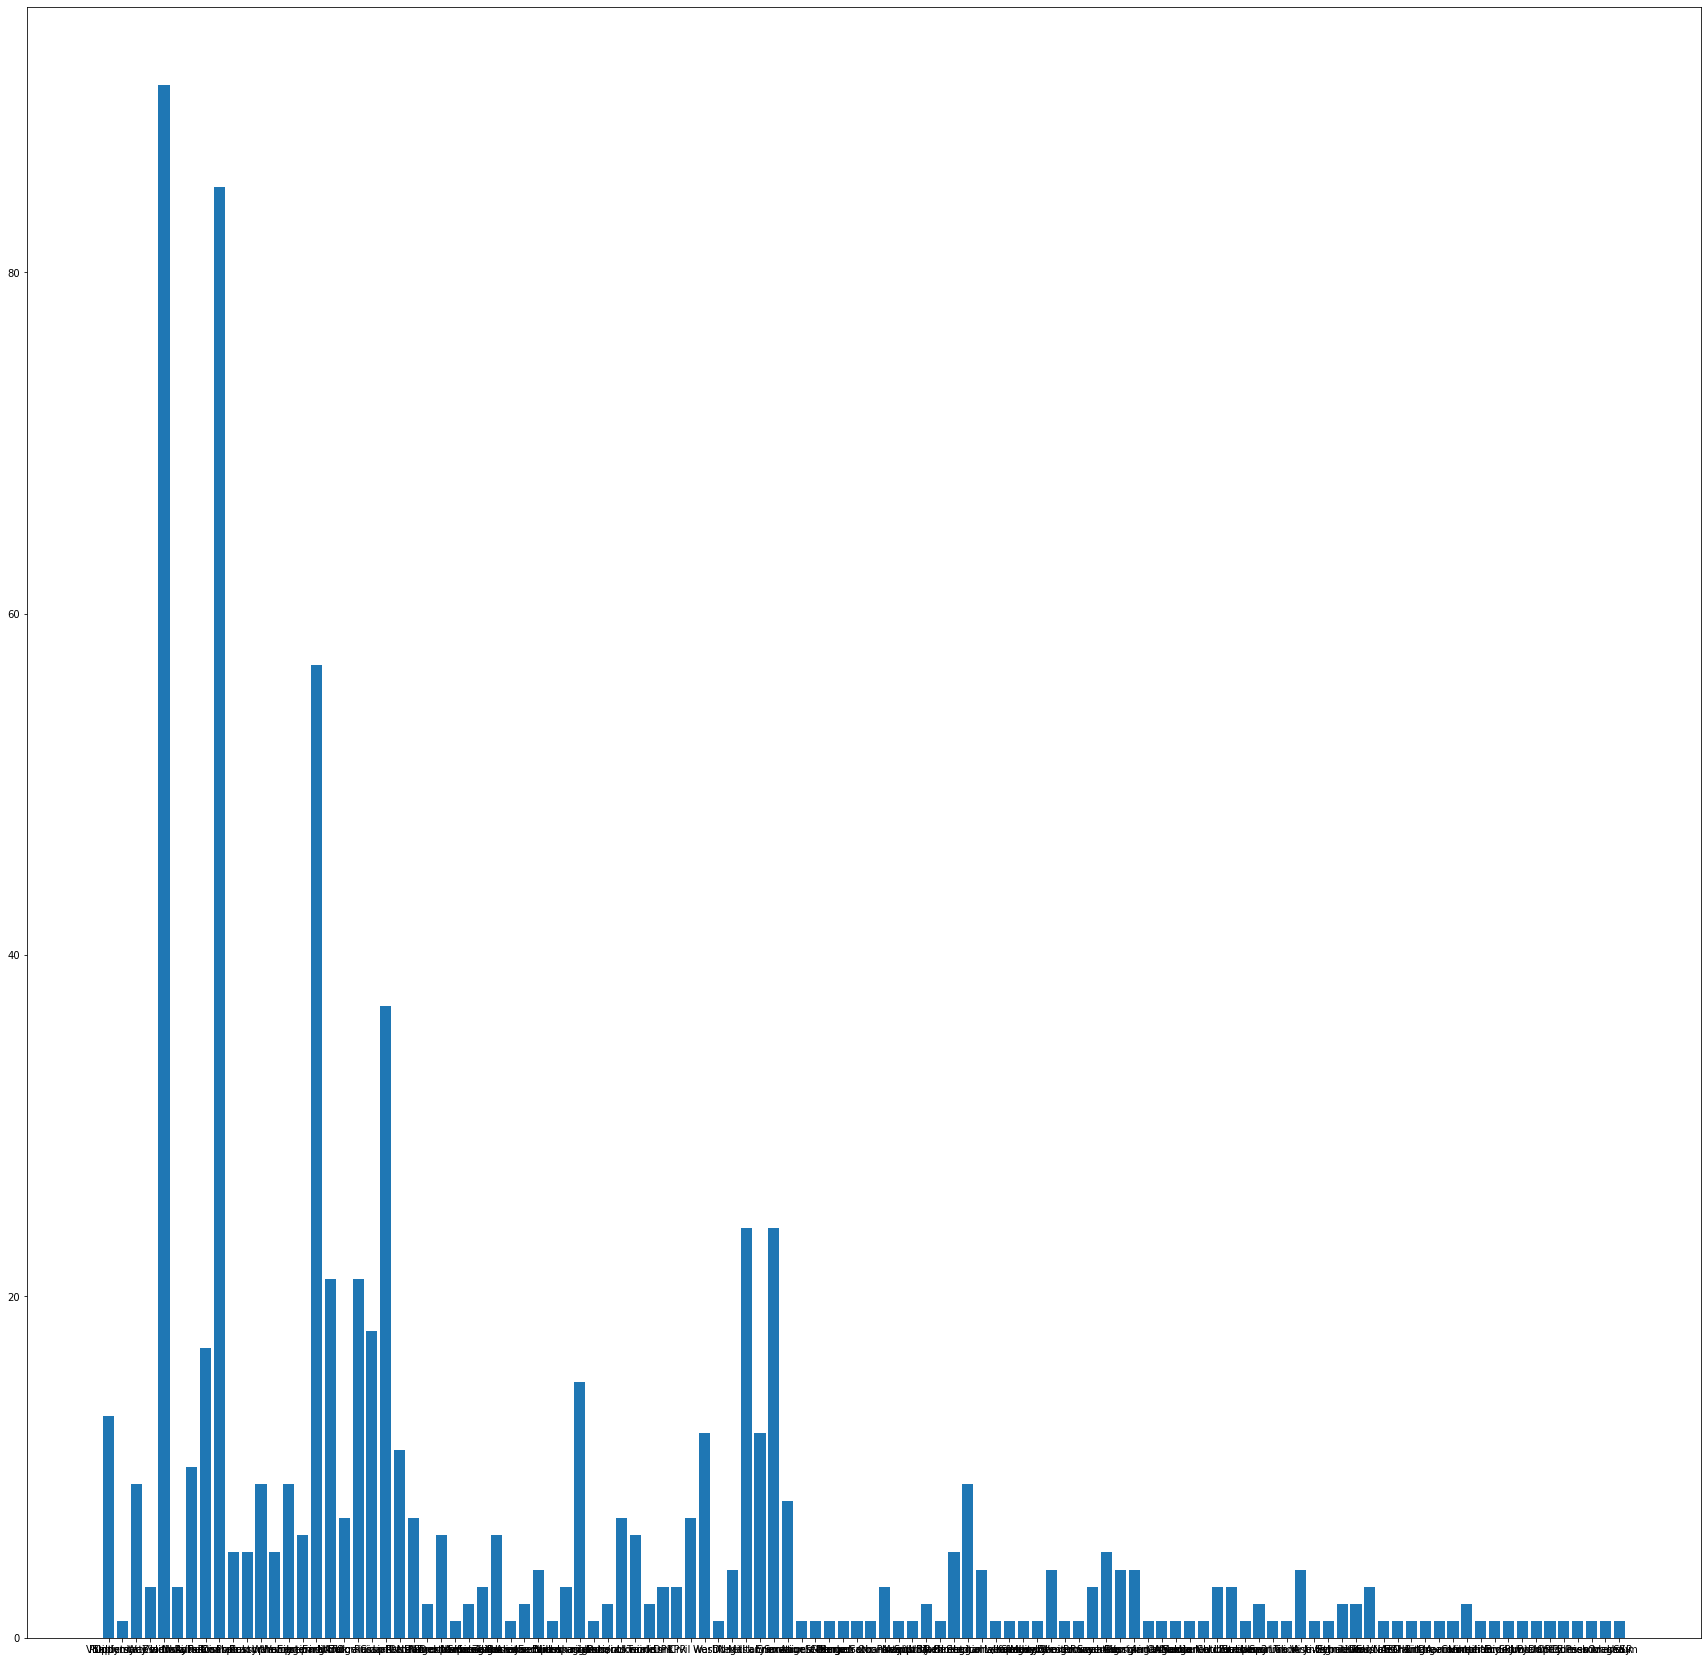

In [19]:
plt.figure(figsize = (30,30))
plt.bar(aprkwd_counts.keys(), aprkwd_counts.values())

In [20]:
large_aprkwds = {}

for keyword in aprkwd_counts:
    if aprkwd_counts[keyword] > 50: large_aprkwds[keyword] = aprkwd_counts[keyword]

pprint(large_aprkwds)

{'Donbas': 85, 'Eastern Ukraine': 57, 'War in Ukraine': 91}


*Donbas:* "Russia seized **Crimea** from Ukraine in 2014 and is supplying an armed insurgency in the **Donbass** region of **eastern Ukraine**, which borders Russia" (NPR, Apr 22, 2021)

Lets look at the keywords from August 2021 too.

<BarContainer object of 103 artists>

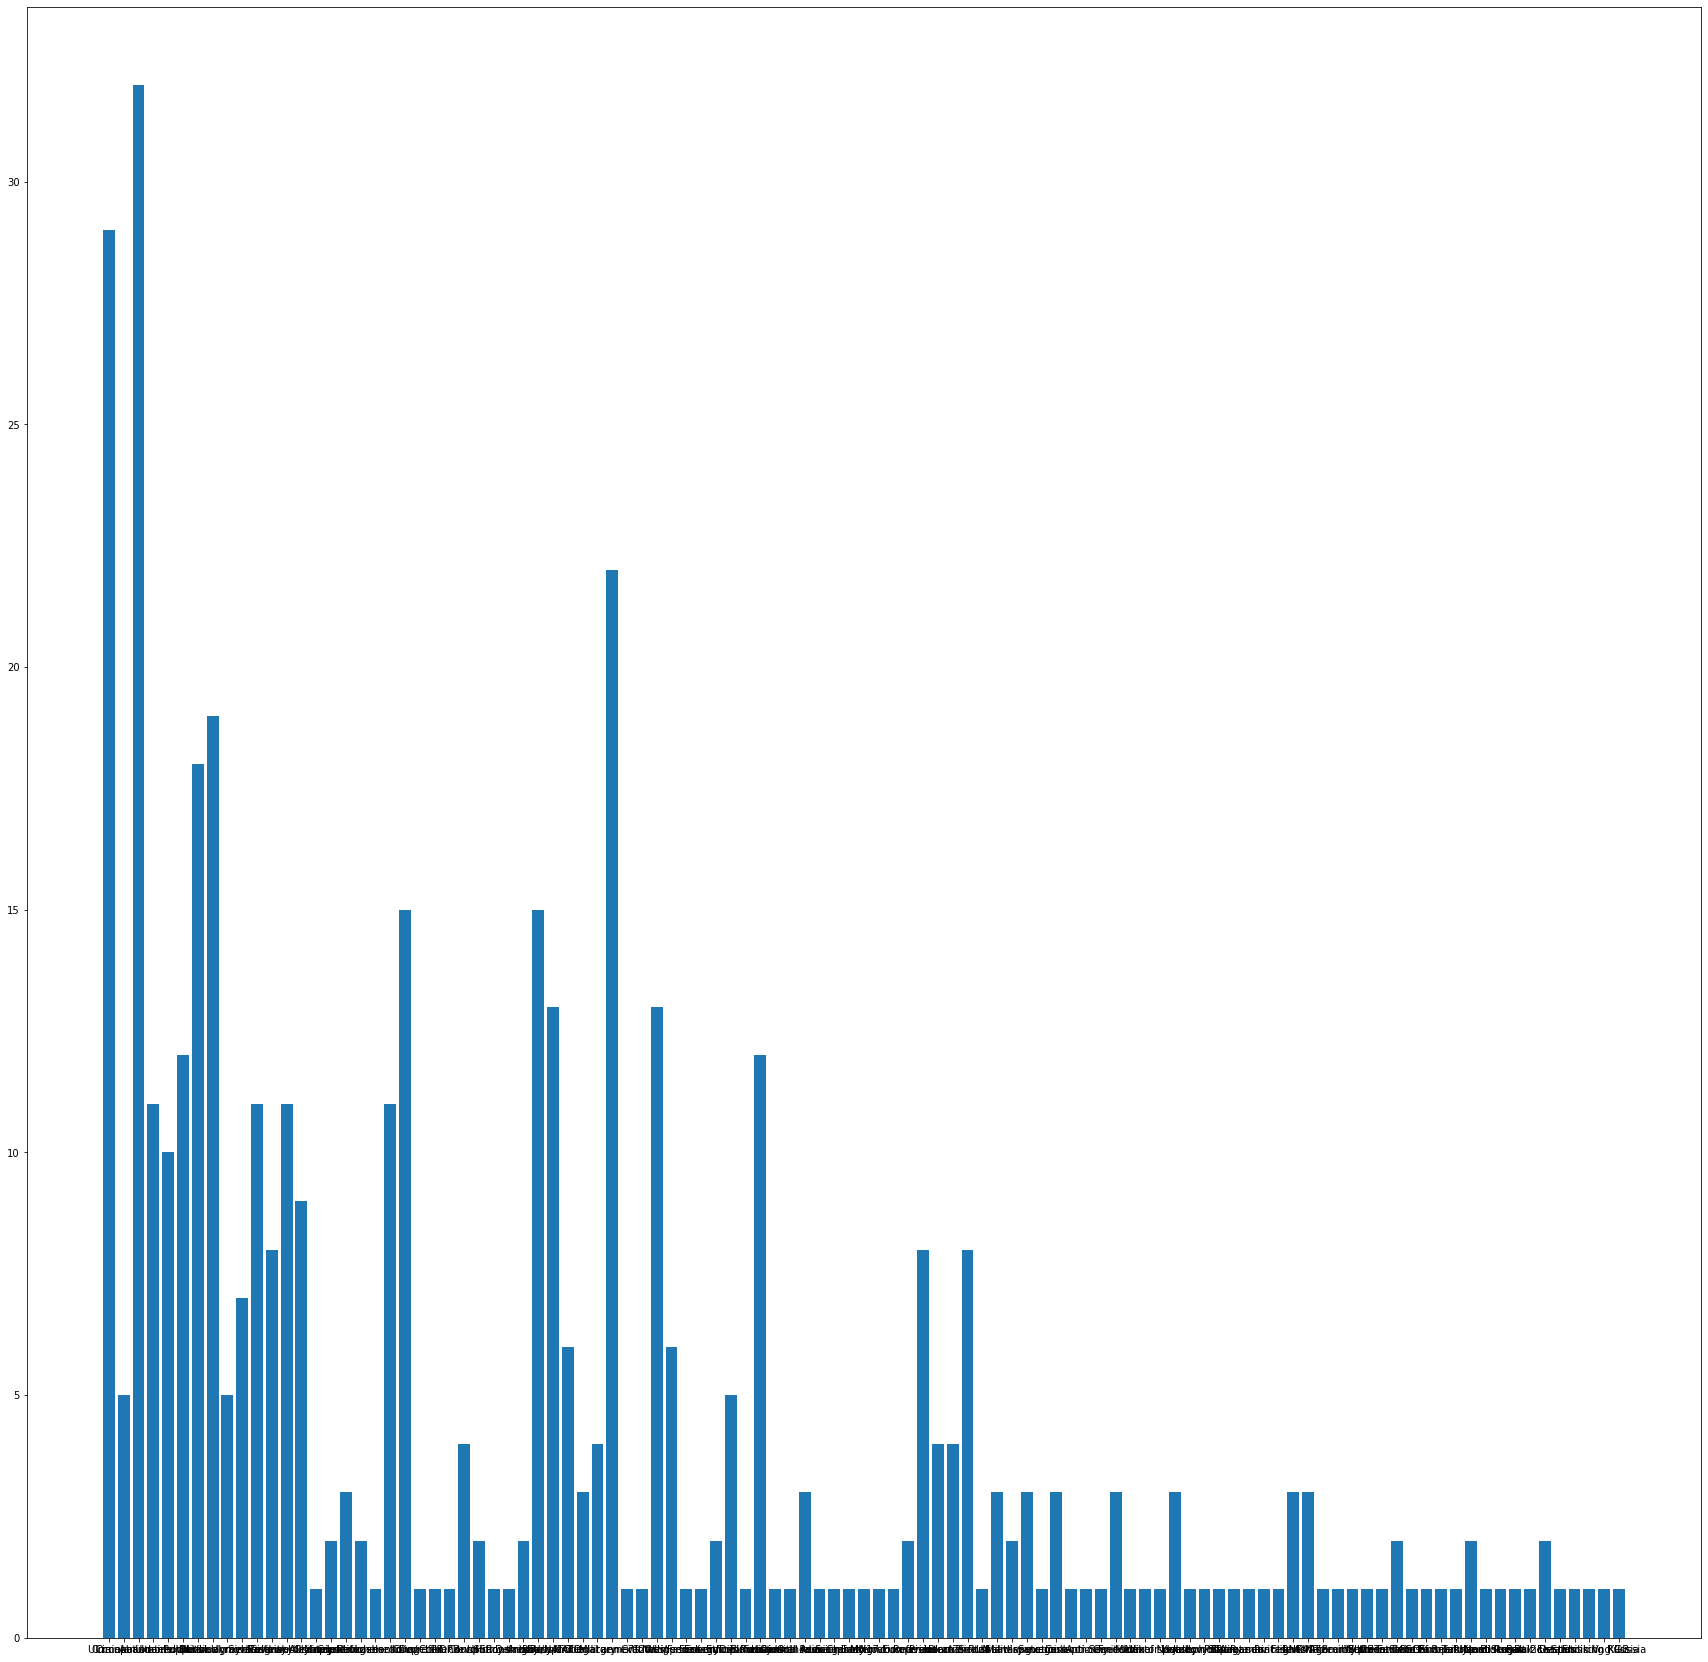

In [21]:
aug2021 = {}
augkeywords = []

for case in eu_data:
    if case['date'].year == 2021 and case['date'].month == 8:
        if case['date'] in aug2021:
            aug2021[case['date']].extend(case['keywords'])
            augkeywords.extend(case['keywords'])
        else: 
            aug2021[case['date']] = case['keywords']
            augkeywords.extend(case['keywords'])
            
augkwd_counts = {}

for keyword in augkeywords:
    if keyword in augkwd_counts: augkwd_counts[keyword] += 1
    else: augkwd_counts[keyword] = 1
    
plt.figure(figsize = (30,30))
plt.bar(augkwd_counts.keys(), augkwd_counts.values())

In [22]:
large_augkwds = {}

for keyword in augkwd_counts:
    if augkwd_counts[keyword] > 15: large_augkwds[keyword] = augkwd_counts[keyword]

pprint(large_augkwds)

{'Crimea': 29,
 'Donbas': 18,
 'Ukrainian statehood': 32,
 'War in Ukraine': 19,
 'illegal annexation': 22}


These are less relevant to the NPR timeline than in the previous example - it's hard to tell if there is a pattern here or not based on these 2 cases. Let's look at the most popular keywords for 2022.

In [23]:
kwds22 = {}
kwds22list = []

for case in eu_data:
    if case['date'].year == 2022:
        if case['date'] in kwds22:
            kwds22[case['date']].extend(case['keywords'])
        else: 
            kwds22[case['date']] = case['keywords']
        kwds22list.extend(case['keywords'])
            
kwds22_counts = {}

for keyword in kwds22list:
    if keyword in kwds22_counts: kwds22_counts[keyword] += 1
    else: kwds22_counts[keyword] = 1

for keyword in kwds22_counts: 
    if kwds22_counts[keyword] > 200: print(keyword)

War in Ukraine


hmm okay not sure what to do with that

### Keyword Analysis

Finding the most popular keywords per year

In [24]:
import collections
import heapq
def topKFrequent(nums, k):
        res=[]
        dict = collections.Counter(nums)
        for val, count in dict.items():
            if len(res)<k:
                heapq.heappush(res,(count,val))
            else:
                heapq.heappush(res,(count,val))
                heapq.heappop(res)
        return [val for count, val in res]

In [25]:
yearkwds = {}
for case in eu_data:
    year = case['date'].year
    keywords = case['keywords']
    for word in keywords:
        if word == 'null': keywords.remove('null')
    
    if year in yearkwds: yearkwds[year]['allkwds'].extend(keywords)
    else: yearkwds[year] = {'allkwds': keywords, 'freqkwds': []}

#pprint(yearkwds) #uncomment to test

In [26]:
kwd_counts = {}
for year in yearkwds:
    # count how many times each kwd occurs
    allkwds = yearkwds[year]['allkwds']
    yearkwds[year]['freqkwds'] = topKFrequent(allkwds, 10)
    '''
    for kwd in allkwds:
        if kwd in kwd_counts: kwd_counts[kwd] += 1
        else: kwd_counts[kwd] = 1
    
    for kwd in kwd_counts:
        if kwd_counts[kwd] > 200 and kwd != "null": 
            yearkwds[year]['freqkwds'].append(kwd)
            '''
        
#print
for year in yearkwds:
    print(str(year) + ": " + str(yearkwds[year]['freqkwds']))

2022: ['War crimes', 'Euromaidan', 'West', 'Nazi/Fascist', 'Eastern Ukraine', 'War in Ukraine', 'NATO', 'Donbas', 'Ukrainian statehood', 'Anti-Russian']
2021: ['NATO', 'Coup', 'illegal annexation', 'Crimea', 'Euromaidan', 'Ukrainian statehood', 'Anti-Russian', 'War in Ukraine', 'Donbas', 'Eastern Ukraine']
2020: ['MH17', 'illegal annexation', 'Anti-Russian', 'Eastern Ukraine', 'Ukraine', 'Donbas', 'Ukrainian statehood', 'Crimea', 'Euromaidan', 'War in Ukraine']
2019: ['Anti-Russian', 'West', 'Ukrainian statehood', 'Eastern Ukraine', 'European Union', 'Ukraine', 'Donbas', 'War in Ukraine', 'Crimea', 'Conspiracy theory']
2018: ['Euromaidan', 'Eastern Ukraine', 'West', 'European Union', 'Ukrainian statehood', 'MH17', 'Nazi/Fascist', 'War in Ukraine', 'Donbas', 'Crimea']
2017: ['Economic difficulties', 'West', 'Petro Poroshenko', 'Europe', 'NATO', 'War in Ukraine', 'European Union', 'Crimea', 'Nazi/Fascist', 'Donbas']
2016: ['NATO', 'Petro Poroshenko', 'Euromaidan', 'Coup', 'West', 'Europe

### Finding most popular keywords per month

In [38]:
monthkwds = {}
for case in eu_data:
    year = case['date'].year
    month = case['date'].month
    myr = case['date'].strftime("%Y-%m")
    keywords = case['keywords']
    
    for word in keywords:
        if word == 'null': keywords.remove('null')
    
    if myr in monthkwds: monthkwds[myr]['allkwds'].extend(keywords)
    else: monthkwds[myr] = {'allkwds': keywords, 'freqkwds': []}
    
#pprint(monthkwds)

In [39]:
kwd_counts = {}
for month in monthkwds:
    # count how many times each kwd occurs
    allkwds = monthkwds[month]['allkwds']
    monthkwds[month]['freqkwds'] = topKFrequent(allkwds, 5)

#print
for month in monthkwds:
    print(str(month) + ": " + str(monthkwds[month]['freqkwds']))

2022-04: ['Anti-Russian', 'Donbas', 'Nazi/Fascist', 'War crimes', 'War in Ukraine']
2022-05: ['war crimes', 'Nazi/Fascist', 'Ukrainian statehood', 'War in Ukraine', 'Invasion of Ukraine']
2022-03: ['laboratory', 'Nazi/Fascist', 'Donbas', 'Biological weapons', 'War in Ukraine']
2022-02: ['Anti-Russian', 'NATO', 'Eastern Ukraine', 'War in Ukraine', 'Donbas']
2022-01: ['NATO', 'West', 'Anti-Russian', 'War in Ukraine', 'Donbas']
2021-12: ['Eastern Ukraine', 'Ukrainian statehood', 'Crimea', 'War in Ukraine', 'Donbas']
2021-11: ['Anti-Russian', 'Donbas', 'Crimea', 'NATO', 'War in Ukraine']
2021-10: ['illegal annexation', 'Eastern Ukraine', 'Crimea', 'Donbas', 'War in Ukraine']
2021-09: ['Ukrainian statehood', 'Crimea', 'Donbas', 'illegal annexation', 'War in Ukraine']
2021-08: ['Donbas', 'War in Ukraine', 'illegal annexation', 'Crimea', 'Ukrainian statehood']
2021-07: ['Black Sea', 'Anti-Russian', 'War in Ukraine', 'Ukrainian statehood', 'Crimea']
2021-06: ['Coup', 'Donbas', 'NATO', 'Crimea'

In [40]:
# yay data

**Periods in NPR timeline:**<br>
2014 - Euromaidan & annexation of Crimea <br>
<br>
February 2015 - Minsk II agreements signed: stop fighting in Eastern Ukraine <br>
<br>
2016 - attack on Kyiv's power grid that causes a major blackout <br>
<br>
2017 - large-scale assault affects key Ukrainian infrastructure, including the National Bank of Ukraine and the country's electrical grid. <br>
<br>
April 2019 - comedian and actor Volodymyr Zelenskyy is elected president in a landslide <br>
<br>
April 2021 - Russia sends about 100,000 troops to Ukraine's borders, ostensibly for military exercises. Although few analysts believe an invasion is imminent, Zelenskyy urges NATO leadership to put Ukraine on a timeline for membership. Later that month, Russia says it will withdraw the troops, but tens of thousands remain. <br>
<br>
Nov 2021 - Russia renews its troop presence near the Ukraine-Russia border, alarming U.S. intelligence officials, who travel to Brussels to brief NATO allies on the situation. <br>
<br>
Dec 2021 - Biden, speaking with Putin on a phone call, urges Russia not to invade Ukraine, warning of "real costs" if Russia does so. <br>
<br>
Jan 2022 - Russian Deputy Foreign Minister Sergei Ryabkov tells U.S. officials that Russia has no plans to invade Ukraine. NATO places forces on standby the next day, including the U.S. ordering 8,500 troops in the United States to be ready to deploy. <br>
<br>
Feb 2022 - the fighting escalates between Russian-backed separatists and Ukrainian forces in the two eastern regions of Donetsk and Luhansk. Separatist leaders call for evacuations. "In our view, what is happening in Donbas today is, in fact, genocide," says Putin on Feb. 15 — a false claim that Western officials say Putin is using to create a pretext for an invasion. Russia continues to build its troop presence on its border with Ukraine. Estimates range from 150,000 to 190,000 troops. U.S. officials, including Biden, increase the urgency of their warnings, saying that Russia has decided to invade. On Feb. 21, Putin formally recognizes the independence of the Donetsk People's Republic and the Luhansk People's Republic — including territory claimed by separatists but controlled by the Ukrainian armed forces. 






https://en.wikipedia.org/wiki/Russia%E2%80%93Ukraine_relations

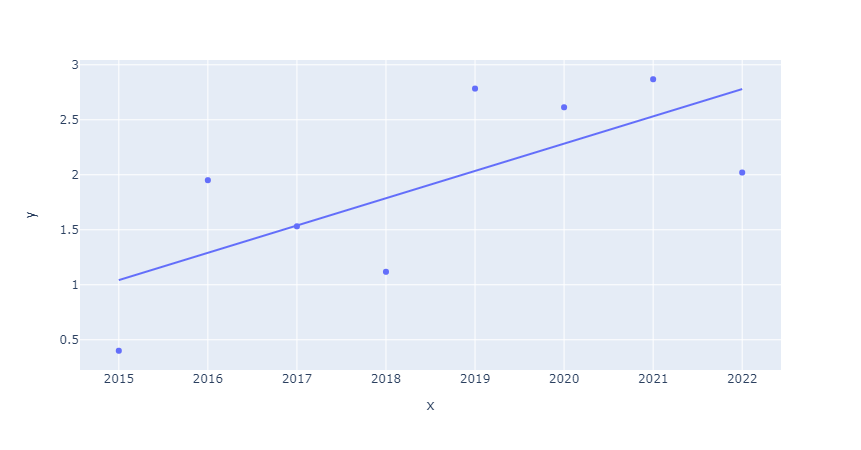

In [41]:
import plotly.express as px

fig = px.scatter(x=year_avg_counts.keys(), y=year_avg_counts.values(), trendline="ols")
fig.show()

R-squared is roughly 0.5, so it's a moderate positive correlation - which makes sense because we would expect there to be increases and decreases in disinformation output over the past 7 years since the conflicts have escalated and deescalated over the time period, but ultimately escalated since Russia is now at war with Ukraine... it's hard to conclude a lot from this since the correlation is fairly weak and I don't have a numeric proxy for the conflict escalating.

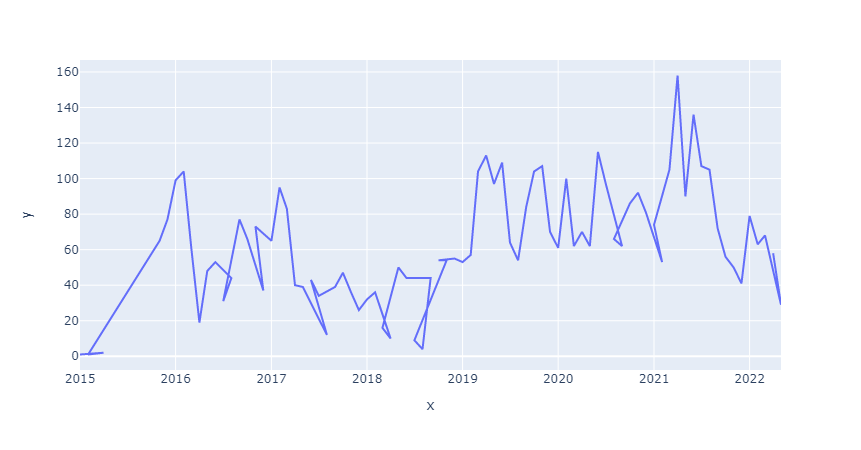

In [42]:
fig = px.line(x=month_counts.keys(), y=month_counts.values())
fig.show()
# TO DO: implement data frame so top keywords show on hover

In [60]:
import pandas as pd
mf = pd.DataFrame.from_dict(month_counts, 'index')

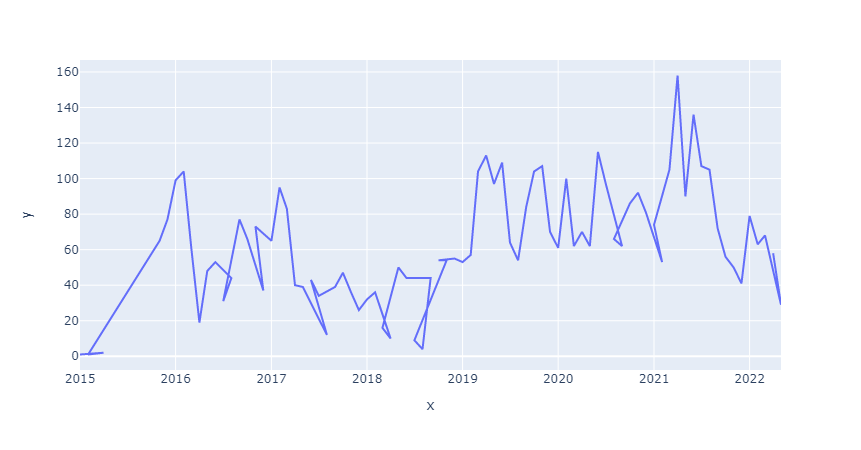

In [62]:
fig = px.line(mf, x=month_counts.keys(), y=month_counts.values())
fig.show()

In [83]:
df_dict = {}
for month in month_counts:
    df_dict[month] = {}
    df_dict[month]['case_counts'] = month_counts[month]
    df_dict[month]['k'] = monthkwds[month]['freqkwds']
#pprint(df_dict) #uncomment to test

In [84]:
'''
user_dict = {12: {'Category 1': {'att_1': 1, 'att_2': 'whatever'},
                  'Category 2': {'att_1': 23, 'att_2': 'another'}},
             15: {'Category 1': {'att_1': 10, 'att_2': 'foo'},
                  'Category 2': {'att_1': 30, 'att_2': 'bar'}}}

pd.DataFrame.from_dict({(i,j): user_dict[i][j] 
                           for i in user_dict.keys() 
                           for j in user_dict[i].keys()},
                       orient='index')


               att_1     att_2
12 Category 1      1  whatever
   Category 2     23   another
15 Category 1     10       foo
   Category 2     30       bar
'''
"DataFrame.from_dict(data, orient='columns', dtype=None, columns=None)"
df = pd.DataFrame.from_dict({i: df_dict[i] 
                           for i in df_dict.keys()},
                       orient='index')
print(df)

         case_counts                                                  k
2022-04           58  [Anti-Russian, Donbas, Nazi/Fascist, War crime...
2022-05           29  [war crimes, Nazi/Fascist, Ukrainian statehood...
2022-03           68  [laboratory, Nazi/Fascist, Donbas, Biological ...
2022-02           63  [Anti-Russian, NATO, Eastern Ukraine, War in U...
2022-01           79  [NATO, West, Anti-Russian, War in Ukraine, Don...
...              ...                                                ...
2015-12           77  [Crimea, Nazi/Fascist, Daesh, War in Ukraine, ...
2015-11           65  [Crimea, Daesh, Nazi/Fascist, War in Ukraine, ...
2015-02            1                                       [Euromaidan]
2015-04            2                                            [Daesh]
2015-01            1                               [Lviv, social media]

[82 rows x 2 columns]


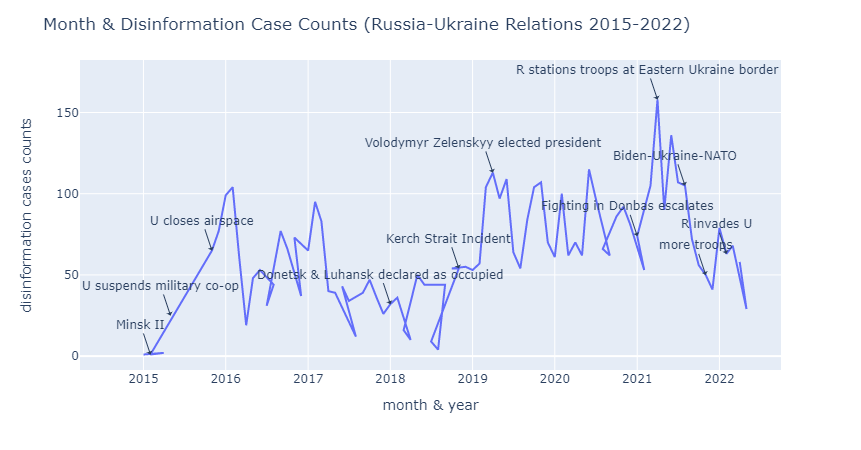

In [157]:
fig = px.line(df, x=df.index, y='case_counts', hover_data="k")
fig.update_layout(
    title_text='Month & Disinformation Case Counts (Russia-Ukraine Relations 2015-2022)',
    xaxis_title='month & year',
    yaxis_title='disinformation cases counts')
fig.add_annotation(x='2022-02',y=63,
            text="R invades U",
            showarrow=True,
            arrowhead=1)
fig.add_annotation(x='2021-04',y=158,
                    text="R stations troops at Eastern Ukraine border",
                   showarrow=True,
                   arrowhead=1)
add_label('2015-02',1,"Minsk II")
add_label('2019-04',113,"Volodymyr Zelenskyy elected president")
add_label('2021-08',105,"Biden-Ukraine-NATO")
add_label('2021-11',50,"more troops")
add_label('2015-05',25,"U suspends military co-op")
add_label('2015-11',65,"U closes airspace")
add_label('2018-01',32,"Donetsk & Luhansk declared as occupied")
add_label('2018-11',54,"Kerch Strait Incident")
add_label('2021-01',74,"Fighting in Donbas escalates")
fig.show()

Hover over the graph to show the top keywords during that period of time!

In [122]:
def add_label(date, count, text):
  fig.add_annotation(x=date,y=count,
                    text=text,
                   showarrow=True,
                   arrowhead=1)  

Conclusions:
- disinformation topics/keywords doesn't always correlate with events, but it does sometimes that makes sense since as I discussed earlier, some disinformation/propaganda is totally random & untrue, whereas others presents a biased view of real-world events
- disinformation output seems to spike around or slightly after key events - the graph is so spike-y it's hard to say for sure if those particular spikes are associated with the events, but some experts have said that Russian disinformation campaigns are done to justify actions, and this could indicate a relation to that claim
- in general, we can see that disinformation after 2019 is way higher than before 2019 - so before the 2022 information, disinformation does seem to increase